In [1]:
import raga.vae as ragvae # for the unsupervised a VAE
import raga.cvae as ragcvae # for the supervised a VAE

IndentationError: unindent does not match any outer indentation level (vae.py, line 536)

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 VAE learning rate search procedure
Refer to Bastien et al.(2021) Section 5.2. Procedure used for both Unsupervised VAE and Conditional VAE. Can be done for different latent dimensions. Learning rate is done between 0.0005 to 0.0015 in steps of 0.0001. Parameter to be provided are latent dimensions, number of training epochs for each learning rate search and results log directory

In [21]:
ragvae.lrsearch(16,2,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/LOGS')

000000007
[epoch 000]  average training loss: 280.9244 testing loss: 162.0447
[epoch 001]  average training loss: 187.0864 testing loss: 165.7733
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.0007800000000000007
[epoch 000]  average training loss: 25893200.5151 testing loss: 233.5939
[epoch 001]  average training loss: 211.2537 testing loss: 175.3193
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.0007900000000000008
[epoch 000]  average training loss: 289.7799 testing loss: 165.6098
[epoch 001]  average training loss: 187.1109 testing loss: 165.1095
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.0008000000000000008
[epoch 000]  average training loss: 264.3180 testing loss: 161.7136
[epoch 001]  average training loss: 181.9546 testing loss: 152.6885
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++

(100.0, 300.0)

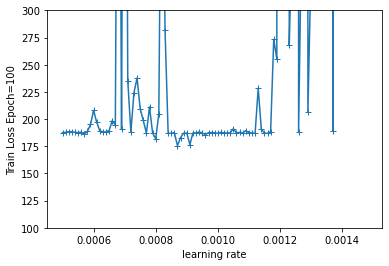

In [14]:
data=pd.read_csv('/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/LOGS/data_lr_experiment_exp0_d32.csv')[1:]
data['train_loss']=data['train_loss'].fillna(100000)
plt.plot(data['learning_rate'],data['train_loss'],'+-')
plt.xlabel('learning rate')
plt.ylabel('Train Loss Epoch=100')
plt.ylim(100,300)

## 1.2 VAE training
ragvae.vaetrain can be used to train the VAE it takes as parameters: 1. the model directory, 2. The learning rate, 3. The latent dimensions, 4.The number of epochs to be trained and 5.The log directory . The Weights are saved at every 50 epochs in the model directory.

In [3]:
ragvae.vaetrain('/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS',0.000860000000000001,32,100,"/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/LOGS")

0-000860000000000001
/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/USUP-MODELS-d32-0-000860000000000001-2021-02-17
Successfully created the directory /home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/USUP-MODELS-d32-0-000860000000000001-2021-02-17 
Files already downloaded and verified
Files already downloaded and verified
[epoch 000]  average training loss: 292.8023 testing loss: 162.2371 inception score: 1.0035
saving model to ...
saving optimizer states...
done saving model and optimizer checkpoints to disk.
checkpoint saved to /home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/USUP-MODELS-d32-0-000860000000000001-2021-02-17
[epoch 001]  average training loss: 187.3199 testing loss: 161.2583 inception score: 1.0033
[epoch 002]  average training loss: 186.3631 testing loss: 166.6491 inception score: 1.0032
[epoch 003]  average training loss: 185.2401 testing loss: 166.9937 inception score: 1.0033
[epoch 004]  average training loss

## 1.3 VAE inference function
The inference function is the final 

In [4]:
VAE_MOD=ragvae.inference_function(32,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/MODEL_VAE_D32.mod','/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/OPTIMIZER_VAE_D32.opt')

loading model from ...
loading optimizer states from ...
done loading model and optimizer states.


In [37]:
number_of_sources = 100
latent_dimension = 32
z_fr = torch.randn(number_of_sources, latent_dimension)
for i in range (0,number_of_sources):
    for j in range (0,latent_dimension):
        z_fr[i,j] = np.random.uniform(-5,5)
    
sample1 = VAE_MOD.decoder(z_fr.cuda()).cpu().detach().numpy().reshape(number_of_sources,1,100,100)

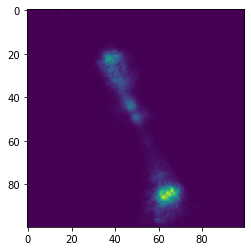

In [39]:
plt.imshow(sample1[46,0,:,:])

In [86]:
data_images=ragvae.inference_function_main(32,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/MODEL_VAE_D32.mod','/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/OPTIMIZER_VAE_D32.opt',10,False)

loading model from ...
loading optimizer states from ...
done loading model and optimizer states.


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

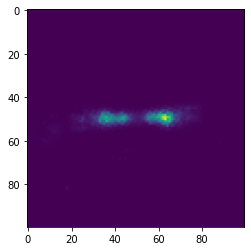

In [67]:
plt.imshow(data_images[22])

To Do:
    1. Allow use of difference training datasets
    2. Change Neural Network Architecture (Encoder and Decoder Architeture)
    3. Make use of config files 
    4. Model fine tuning

In [2]:
ragcvae.lrsearch(32,2,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/LOGS')

Files already downloaded and verified
Files already downloaded and verified
0.0005
[epoch 000]  average training loss: 308.9159 testing loss: 165.7963
[epoch 001]  average training loss: 188.1349 testing loss: 163.6169
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.00051
[epoch 000]  average training loss: 308.7014 testing loss: 163.8900
[epoch 001]  average training loss: 188.1893 testing loss: 171.5795
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.0005200000000000001
[epoch 000]  average training loss: 306.0053 testing loss: 165.9986
[epoch 001]  average training loss: 188.4366 testing loss: 164.9250
+++++++++++++++++++++++++++++++++++++Incrementing Learning Rate++++++++++++++++++++++++++++++++++++
0.0005300000000000001
[epoch 000]  average training loss: 318.7570 testing loss: 164.7959
[epoch 001]  average training loss: 188.3057 testing loss: 165.1540
+++++++++++++++++++++

KeyboardInterrupt: 

In [2]:
ragcvae.cvaetrain('/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS',0.000860000000000001,32,3,"/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/LOGS")

0.000860000000000001
/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/SUP-MODELS-d32-0-000860000000000001-2021-02-23
Directory Already Exist Ovewriting Existing Directory Content
Files already downloaded and verified
Files already downloaded and verified
(100, 2)
[epoch 000]  average training loss: 291.6495 testing loss: 165.1586 inception score: 1.0038 Number of FRI: 0.0000 Number of FRII: 100.0000 Sigma Clipped: 8.5013
saving model to ...
saving optimizer states...
done saving model and optimizer checkpoints to disk.
checkpoint saved to /home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/SUP-MODELS-d32-0-000860000000000001-2021-02-23
(100, 2)
[epoch 001]  average training loss: 187.5600 testing loss: 160.0877 inception score: 1.0036 Number of FRI: 0.0000 Number of FRII: 100.0000 Sigma Clipped: 8.4365
(100, 2)
[epoch 002]  average training loss: 186.5335 testing loss: 164.5970 inception score: 1.0028 Number of FRI: 0.0000 Number of FRII: 100.0000 Sigma

In [6]:
CVAE_MOD=ragcvae.inference_function(32,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/MODEL_CVAE_D32.mod','/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/OPTIMIZER_CVAE_D32.opt')

loading model from ...
loading optimizer states from ...
done loading model and optimizer states.


In [7]:
CVAE_MOD

CVAE(
  (encoder_z): EncoderZ(
    (fc1): Linear(in_features=10002, out_features=4096, bias=True)
    (fc2): Linear(in_features=4096, out_features=2048, bias=True)
    (fc3): Linear(in_features=2048, out_features=1024, bias=True)
    (fc4): Linear(in_features=1024, out_features=512, bias=True)
    (fc5): Linear(in_features=512, out_features=256, bias=True)
    (fc61): Linear(in_features=256, out_features=32, bias=True)
    (fc62): Linear(in_features=256, out_features=32, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
    (dropout_1): Dropout(p=0.5, inplace=False)
    (dropout_2): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (fc7): Linear(in_features=34, out_features=256, bias=True)
    (fc8): Linear(in_features=256, out_features=512, bias=True)
    (fc9): Linear(in_features=512, out_features=1024, bias=True)
    (fc10): Linear(in_features=1024, out_features=2048, bias=True)
    (fc11): Linear(in_features=2048, out_features=4096, bias=True)
    (fc12): Linear(i

In [8]:
VAE_MOD

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=10000, out_features=4096, bias=True)
    (fc2): Linear(in_features=4096, out_features=2048, bias=True)
    (fc3): Linear(in_features=2048, out_features=1024, bias=True)
    (fc4): Linear(in_features=1024, out_features=512, bias=True)
    (fc5): Linear(in_features=512, out_features=256, bias=True)
    (fc61): Linear(in_features=256, out_features=32, bias=True)
    (fc62): Linear(in_features=256, out_features=32, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
    (dropout_1): Dropout(p=0.5, inplace=False)
    (dropout_2): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (fc7): Linear(in_features=32, out_features=256, bias=True)
    (fc8): Linear(in_features=256, out_features=512, bias=True)
    (fc9): Linear(in_features=512, out_features=1024, bias=True)
    (fc10): Linear(in_features=1024, out_features=2048, bias=True)
    (fc11): Linear(in_features=2048, out_features=4096, bias=True)
    (fc12): Linear(in_fe

In [72]:
data_images=ragcvae.inference_function_main(32,'/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/MODEL_CVAE_D32.mod','/home/d.bastien/data-cold-for-backup/2_SDC_SOURCE_SIMULATOR/MODELS/OPTIMIZER_CVAE_D32.opt',201,False,0)  

loading model from ...
loading optimizer states from ...
done loading model and optimizer states.
